In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
options(repr.matrix.max.rows = 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

<h1>DSCI 100 Project Final Report</h1>
    
<h3>Introduction:</h3>
Understanding player behaviour is essential for improving game design to retain long-term users and engagement. In this project, we analyzed data from Plaicraft, a Minecraft server operated by a research group at UBC to help them gain insight into their population of users. We explored the question: Can variables such as a player's age and experience level be used to predict the total hours played on the server? This will allow us to assess the extent of the association between these variables with player engagement. If strong correlations were found, it could provide information on future contribution given past participation and identify the key factors influencing player activity. Two datasets were provided to use for our analyses: the Players and the Sessions dataset, which gave information about the players and their gameplay activity. In the Players dataset, there are 197 observations about the demographic: 

- experience (categorical skill level like "Pro", "Amateur", etc.)
- subscribe (logical variable indicating if they are subscribed)
- hashedEmail (unique anonymized ID)
- played_hours (numerical)
- name (categorical)
- gender (categorical)
- age (numerical)

In the Sessions dataset, there are 1536 observations on the individual gameplay sessions:

- hashedEmail (anonymized ID linked to the Players dataset)
- start_time (date and time player started)
- end_time (date and time player stopped)
- original_start_time (unix timestamp)
- original_end_time (unix timestamp)

However, the Sessions dataset was not used due to limitations that made it less suitable for our purposes. The original start time and end time were often identical for sessions under two hours, making it difficult to calculate the durations accurately. The data was also split across multiple records for each player, requiring preprocessing to combine the durations and then match them to the Players dataset. Therefore, using only the Players dataset, which already provided the total hours played, reduced the need for additional wrangling. To build our predictive model, we applied two different regression analyses: K-Nearest Neighbors (KNN) and linear regression and compared which model yields a lower RMSE. This helps us evaluate which technique better captures the relationship between age and experience level with hours played and how effective these variables are in modeling player behaviour.

<h3>Methods & Results:</h3>

The method used to perform our analysis was to conduct both KNN and linear regression using age and self-surveyed experience level to see if they can independently predict the number of hours played. The players.csv dataset was first loaded into Jupyter.

In [4]:
players_url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"

players_data <- read_csv(players_url)

head(players_data)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


Then for the players.csv dataset the columns that had data were selected, players_data, experience, subscribe, hashedEmail, played_hours, gender, and age. The empty columns (individualId, organizationName) were removed.

In [5]:
tidy_plaicraft <- players_data |>
    select(experience, subscribe, hashedEmail, played_hours, gender, age)
head(tidy_plaicraft)

experience,subscribe,hashedEmail,played_hours,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Female,17


Two different types of regression models were tested to determine if it is possible to predict the total played hours using age or self-surveyed experience level. Thus, using regression modelling can help determine whether there is a relationship/correlation between our proposed predictors and our target responses. To select the best regression model we determined the RMSE and chose the model with the lowest error. We conducted these regressions with a 0.75 training and 0.25 testing dataset split. Furthermore, to increase reliability conducted cross-validation to check the model for fitting and performance using a 5 fold function. 

First we created a scatter plot of total hours played versus player age with experience shown by the colour and shape of the points (Using the training portion of the data in the split). This visualization provides a rough idea of what to expect in our predicted results. 

experience,subscribe,hashedEmail,played_hours,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<dbl>
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Male,17
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Female,17
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Male,17
Veteran,TRUE,bbe2d83de678f519c4b3daa7265e683b4fe2d814077f9094afd11d8f217039ec,0.0,Female,22
⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,a1e0438d568b9c05a93cadaf99969e4d44794d19dea31edd723cbc916f878c33,2.7,Non-binary,21
Amateur,FALSE,93efabc9f7de58f44c457bac715cf8f9f44cd88cc574fc02624cac194d2f0ea5,2.1,Male,24
Amateur,TRUE,42382bb2af563e6979c5b84d288cbb49bb2ef90b1bcf196c2902da4ce20eb7f3,0.8,Female,22


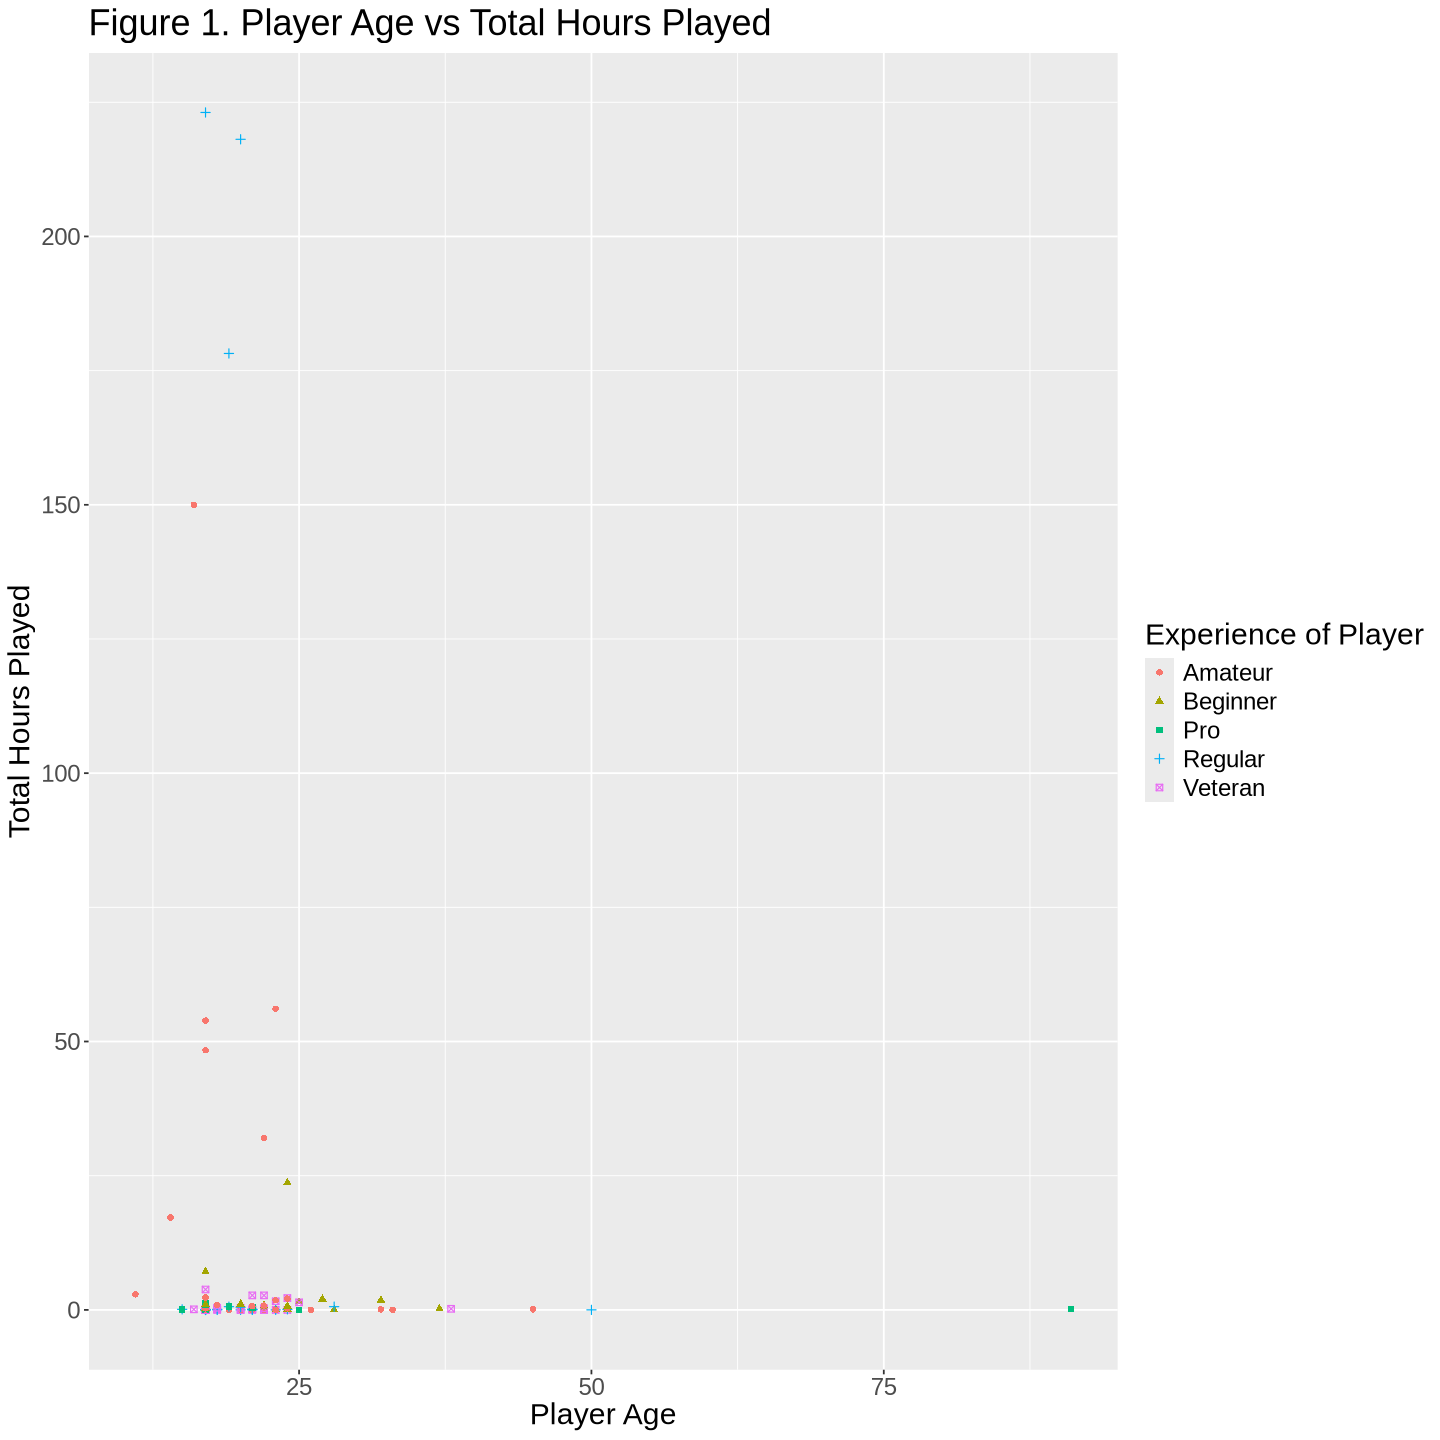

In [40]:
set.seed(411)

split <- initial_split(tidy_plaicraft, prop = 0.75, strata = played_hours)
training <- training(split)
training

options(repr.plot.height = 12, repr.plot.width = 12)
age_plot <- training |>
   ggplot(aes(x = age, y = played_hours, colour = experience, shape = experience)) +
   geom_point() +
   labs(x = "Player Age",
    	y = "Total Hours Played",
    	title = "Figure 1. Player Age vs Total Hours Played",
        colour = "Experience of Player",
        shape = "Experience of Player") +
   theme(text = element_text(size = 18))

age_plot

<h4>Age, KNN-Regression</h4>

For KNN regression of age and played hours, the age data and played hours columns were selected from our players.csv dataset. The data was then split using a 0.75 ratio into a training and testing set. Next, the model function was created setting the engine and mode to knn regression, neighbors was also set to tune() in order to later select the optimal amount of neighbors to reduce error. Following this, the recipe function was created setting played_hours to be predicted by age, and using the step functions to scale all the predictors. To cross-validate we also used the vfold function with a 5 fold to check for the model’s performance and we added our recipe and model into our age workflow function to complete the preparation. 

In [7]:
age_data <- players_data|>
	select(age, played_hours)
      	 
head(age_data)

set.seed(411)

age_split <- initial_split(age_data, prop=0.75, strata = played_hours)
age_training <- training(age_split)
age_testing <- testing(age_split)

set.seed(411)

age_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
	set_engine("kknn")|>
	set_mode("regression")

age_recipe <- recipe(played_hours ~ age, data = age_training)|>
	step_scale(all_predictors()) |>
	step_center(all_predictors())

age_vfold <- vfold_cv(age_training, v=5, strata = played_hours)

age_workflow <- workflow()|>
	add_recipe(age_recipe)|>
	add_model(age_spec)

age_workflow

age,played_hours
<dbl>,<dbl>
9,30.3
17,3.8
17,0.0
21,0.7
21,0.1
17,0.0


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Next to test all the potential neighbors we initiated the process using the tibble function, then applied our age workflow to be tuned using our vfold function and gridval function. We then collected our RMSE metric, filtered it for the lowest neighbor value, and pulled it out to set it as our kmin. The minimum RMSE value occurs at K = 111 which is our Kmin and that was selected for our KNN model to fit onto our data. The preparation steps were then repeated again, now using the kmin neighbor value instead of tune(). As an additional step we created a small table of the .metric, .estimator, and .estimate of the lowest RMSE value that was pulled out. 

In [38]:
set.seed(411)

gridvals <- tibble(neighbors = seq(1, 113, by = 2))

age_results <- age_workflow|>
	tune_grid(resamples = age_vfold, grid = gridvals)|>
	collect_metrics()|>
	filter(.metric=="rmse")
 
head(age_results)

age_min <- age_results|>
	filter(mean==min(mean))

age_min

kmin <- age_min|>
	pull(neighbors)

age_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
  set_engine("kknn") |>
  set_mode("regression")

age_best_fit <- workflow() |>
  add_recipe(age_recipe) |>
  add_model(age_best_spec) |>
  fit(data = age_training)


→ A | warning: 113 samples were requested but there were 115 rows in the data. 110 will be used.

There were issues with some computations   A: x1

→ B | warning: 113 samples were requested but there were 117 rows in the data. 112 will be used.

There were issues with some computations   A: x1
→ C | warning: A correlation computation is required, but `estimate` is constant and has 0
               standard deviation, resulting in a divide by 0 error. `NA` will be returned.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x3   C: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,29.47412,5,10.437025,Preprocessor1_Model01
3,rmse,standard,26.98451,5,9.512896,Preprocessor1_Model02
5,rmse,standard,29.49213,5,8.143220,Preprocessor1_Model03
7,rmse,standard,29.75922,5,8.116119,Preprocessor1_Model04
9,rmse,standard,28.92040,5,8.453160,Preprocessor1_Model05
11,rmse,standard,28.97369,5,8.659003,Preprocessor1_Model06


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
3,rmse,standard,26.98451,5,9.512896,Preprocessor1_Model02


With our best K neighbors value (3) we then proceeded to create a scatter plot of the correlation between player age and played hours to determine the strength of the predictor of age to predict hours played.

.pred,age,played_hours
<dbl>,<dbl>,<dbl>
6.73333333,9,30.3
0.23333333,19,0.0
0.06666667,21,0.0
0.00000000,22,0.0
6.73333333,8,0.3
0.00000000,23,0.1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,8.636651


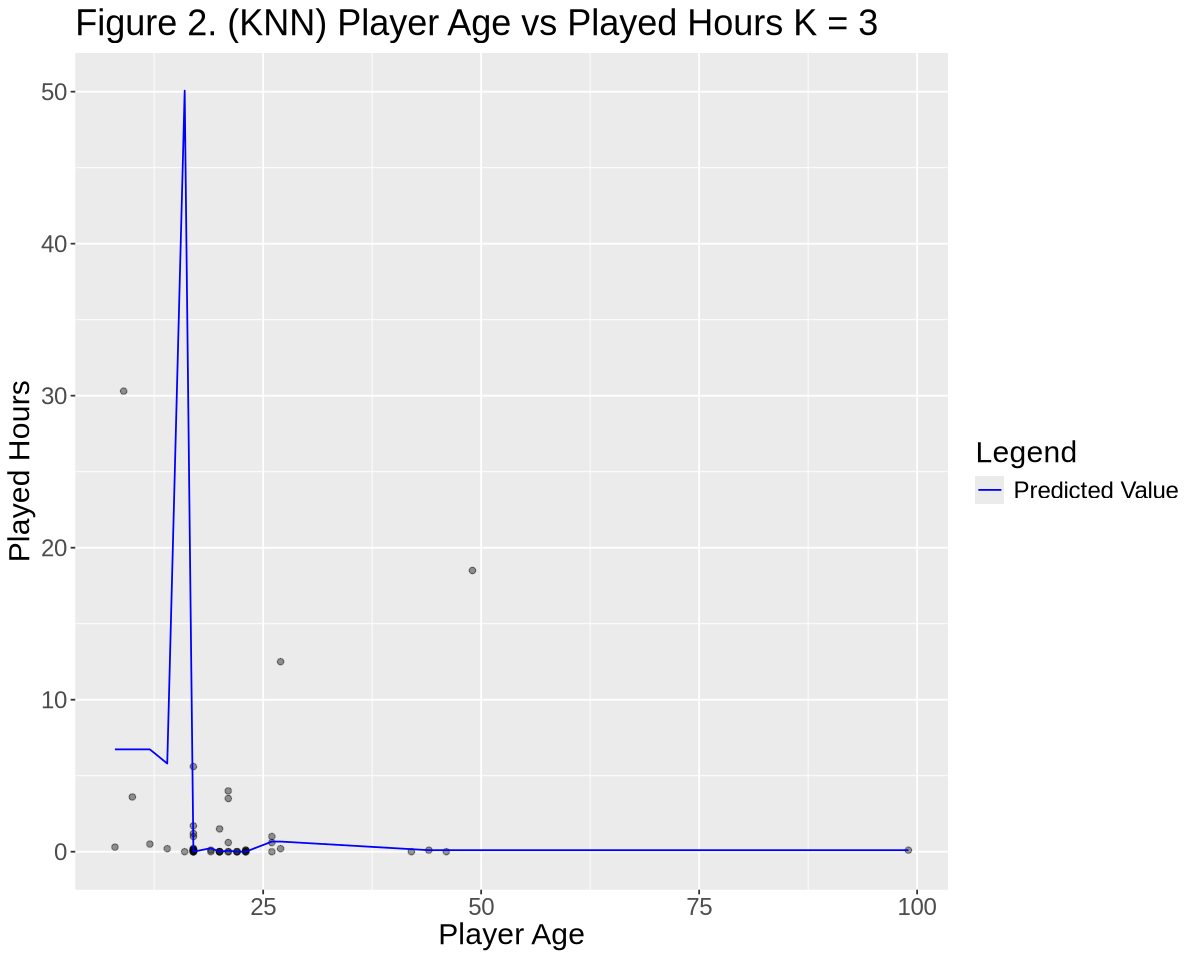

In [41]:
set.seed(411)
options(repr.plot.width=10, repr.plot.height=8)

age_prediction_grid <- tibble(age = seq(from = players_data |> select(age) |> min(),
                                    	to = players_data|> select(age) |> max(), by = 10))

age_preds <- age_best_fit|>
predict(age_testing)|>
bind_cols(age_testing)

head(age_preds)

age_plot <- age_preds|>
	ggplot(aes(x= age, y=played_hours))+
	geom_point(alpha = 0.4)+
	geom_line(data = age_preds, mapping =aes(x=age,y=.pred, color = "Predicted Value")) +
    scale_color_manual(name = "Legend", values = c("Predicted Value" = "blue")) +
	labs(x="Player Age", y= "Played Hours")+
	ggtitle(paste0("Figure 2. (KNN) Player Age vs Played Hours K = ", kmin))+
	theme(text = element_text(size = 18))
age_plot

age_rmse <- age_best_fit |>
  predict(age_testing) |>
  bind_cols(age_testing) |>
  metrics(truth = played_hours, estimate = .pred) |>
  filter(.metric == 'rmse')

age_rmse

From the graph we determined that there was not a strong correlation between a player’s age and the number of hours they played. Secondly, based on our graph it seems the predicted values from our KNN regression do fit the data but it also seems to be very flat. This indicates that the model may not be influenced enough by the training data and may have underfitting. RMSE = 8.64.


<h4>Age, Linear-Regression</h4>

In the following code, we use Linear Regression on the data with age of the player as the explanatory variable to predict a player’s total hours played in the server.

played_hours,age
<dbl>,<dbl>
30.3,9
3.8,17
0.0,17
0.7,21
0.1,21
0.0,17


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          age  
    12.5466      -0.2556  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,7.959298e+00
rsq,standard,4.001080e-06
mae,standard,7.270594e+00


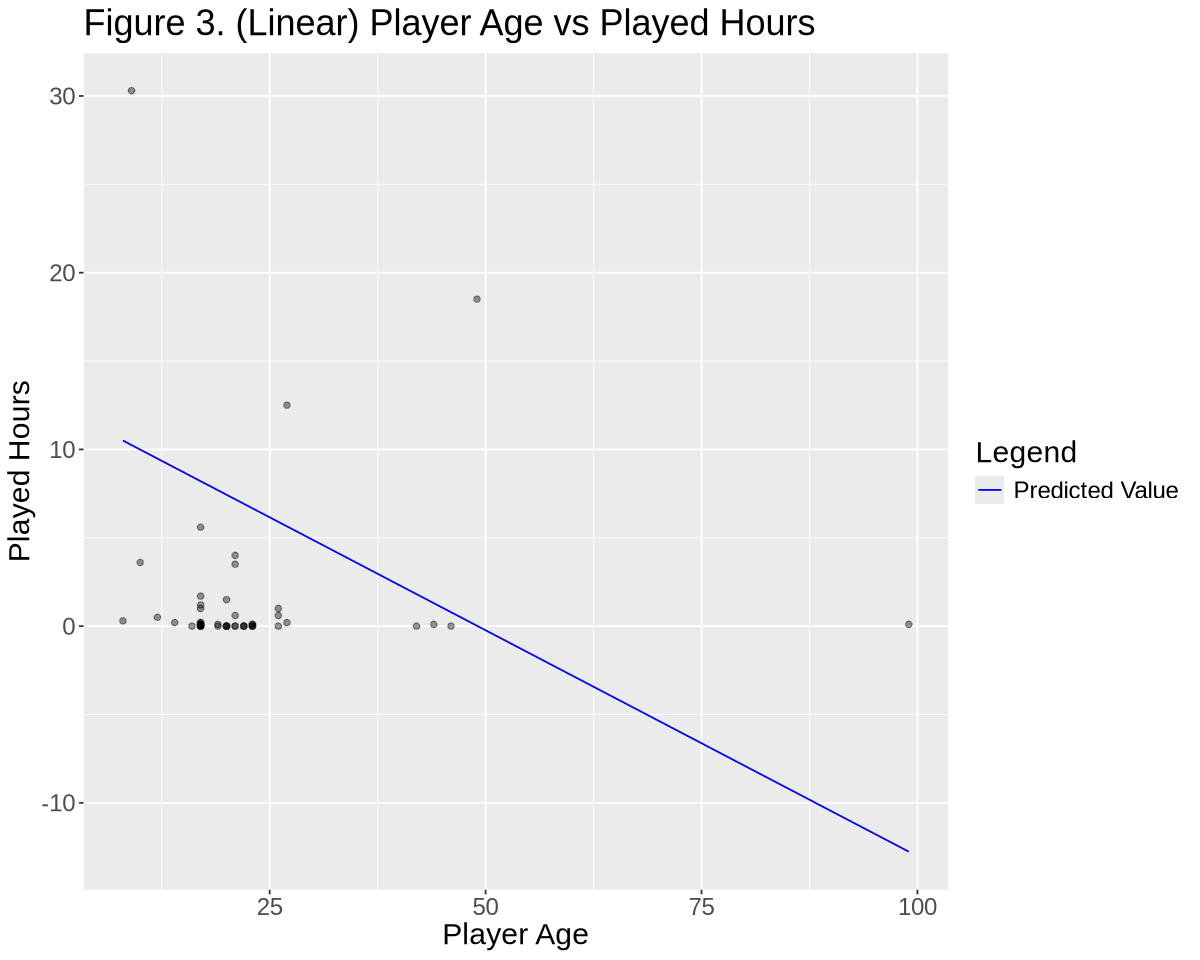

In [31]:
set.seed(411)
options(repr.plot.width = 10, repr.plot.height = 8)
players_age_data <- players_data |> 
    select(played_hours, age)

head(players_age_data)

players_split <- initial_split(players_age_data, prop = 0.75, strata = played_hours)
players_train <- training(players_split) 
players_test <- testing(players_split)

lm_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

players_recipe <- recipe(played_hours ~ age, data = players_train)

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(lm_spec) |>
    fit(data = players_train)

players_fit

players_pred <- players_fit |>
    predict(players_test) |>
    bind_cols(players_test)

players_test_results <- players_pred |>
    metrics(truth = played_hours, estimate = .pred)

lm_predictions <- players_pred |>
     ggplot(aes(x = age, y = played_hours)) +
        geom_point(alpha = 0.4) +
         geom_line(data = players_pred,
             mapping = aes(x = age, y = .pred, color = "Predicted Value")) +
             scale_color_manual(name = "Legend", values = c("Predicted Value" = "blue")) +
         xlab("Player Age") +
         ylab("Played Hours") +
         ggtitle("Figure 3. (Linear) Player Age vs Played Hours") +
         theme(text = element_text(size = 18))

lm_predictions
players_test_results

From the graph we determined that there is a visible correlation between a player’s age and the number of hours they played. Additionally, based on our graph it seems the predicted values make predictions beyond the domain of the data but these findings suggest that past a certain age a player will play negative hours. This brings into question the reliability of the model as playing negative hours is not a possible result. RMSE = 7.96.

<h4>Experience, KNN-Regression</h4>
Players dataset was downloaded and loaded into R and then selected for the specific columns experience and played_hours. The experience column was converted to numerical scaling by ranking them from 1 to 5, assigning 5 for "Veteran" and lower values down to 1 for "Beginner". The dataset was then split into 0.75 training  and 0.25 testing  subsets with strata = played_hours to ensure the proportion was similar across both splits.

In [11]:
players_experience_data <- select(players_data, experience, played_hours)

experience_data <- players_experience_data |>
   mutate(experience_rank = case_when(
       experience == "Veteran" ~ 5,
       experience == "Pro" ~ 4,
       experience == "Regular" ~ 3,
       experience == "Amateur" ~ 2,
       experience == "Beginner" ~ 1,
       TRUE ~ NA_real_)) |>
   select(experience_rank, everything())
head(experience_data)

experience_rank,experience,played_hours
<dbl>,<chr>,<dbl>
4,Pro,30.3
5,Veteran,3.8
5,Veteran,0.0
2,Amateur,0.7
3,Regular,0.1
2,Amateur,0.0


KNN regression model was created using recipe(), KNN model spec, v-fold cross validation on the training set for a grid of values for K, workflow combining recipe and KNN model, and filtering to find the best setting for number of neighbors with the minimum RMSE.

In [12]:
set.seed(411)
players_split <- initial_split(experience_data, prop = 0.75, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)

set.seed(411)
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

players_recipe <- recipe(played_hours ~ experience_rank, data = players_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

players_vfold <- vfold_cv(players_training, v = 5, strata = played_hours)

players_workflow <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec)

players_gridvals <- tibble(neighbors = seq(1, , by = 2))

players_results <- players_workflow |>
   tune_grid(resamples = players_vfold, grid = players_gridvals) |>
   collect_metrics() |>
   filter(.metric == "rmse")

players_min <- players_results |>
    filter(mean == min(mean))
players_min

k_min <- players_min |>
   pull(neighbors)

→ A | warning: A correlation computation is required, but `estimate` is constant and has 0
               standard deviation, resulting in a divide by 0 error. `NA` will be returned.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,26.83821,5,9.54339,Preprocessor1_Model1


In [13]:
players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min)|>
  set_engine("kknn") |>
  set_mode("regression")

players_best_fit <- workflow() |>
   add_recipe(players_recipe) |>
   add_model(players_best_spec) |>
   fit(data = players_training)

players_rmse <- players_best_fit |>
  predict(players_testing) |>
  bind_cols(players_testing) |>
  metrics(truth = played_hours, estimate = .pred) |>
  filter(.metric == "rmse")

players_preds <- players_best_fit |>
   predict(players_testing) |>
   bind_cols(players_testing)

players_preds

.pred,experience_rank,experience,played_hours
<dbl>,<dbl>,<chr>,<dbl>
0.0,4,Pro,30.3
0.1,3,Regular,0.0
0.1,2,Amateur,0.0
0.1,2,Amateur,0.0
0.1,3,Regular,0.3
⋮,⋮,⋮,⋮
0,5,Veteran,0.0
0,5,Veteran,0.1
0,4,Pro,0.2


After, the KNN model was retrained and fit using a new workflow. Next, predictions were made for the testing set and calculated the RMSE using metrics() and used the prediction results for training to plot a scatter plot relationship between experience_rank and played_hours.

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,5.461282


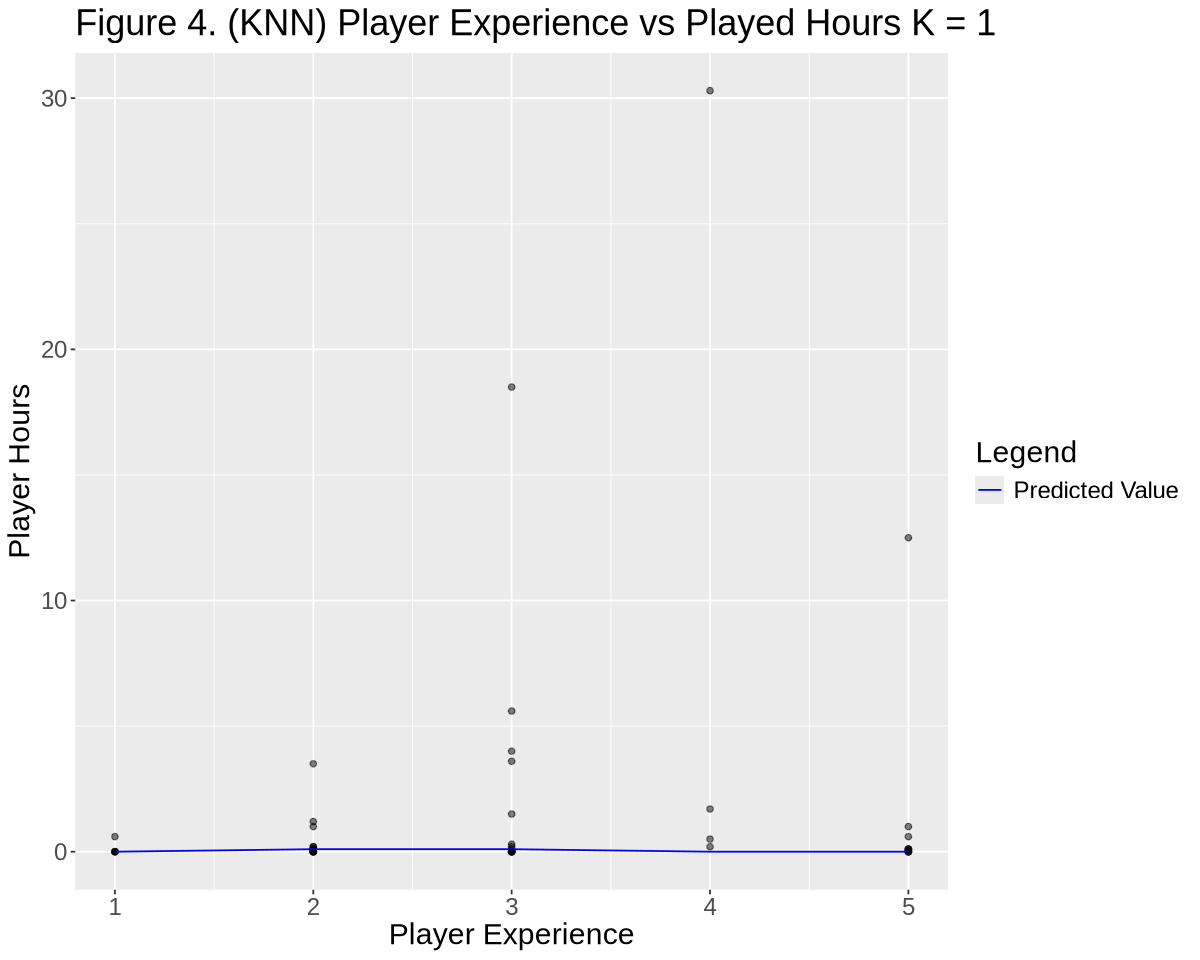

In [32]:
options(repr.plot.width = 10, repr.plot.height = 8)
players_plot <- players_preds |>
  ggplot(aes(x = experience_rank, y = played_hours)) +
  geom_point(alpha = 0.5) +
  geom_line(data = players_preds, mapping = aes(x = experience_rank, y = .pred, colour = "Predicted Value")) +
  scale_color_manual(name = "Legend", values = c("Predicted Value" = "blue")) +
  labs(x = "Player Experience",
       y = "Player Hours") +
   ggtitle(paste0("Figure 4. (KNN) Player Experience vs Played Hours K = ", players_min)) +
  theme(text = element_text(size = 18))
 players_plot
players_rmse

From the graph we determined that there is not an easily visible correlation between a player’s experience and the number of hours they played. Additionally, based on our graph it seems the predicted values from our KNN regression form a flat line. This created difficulties in interpretation of why the line is flat as it could be the nature of the dataset itself or potential underfitting. RMSE = 5.46.

<h4>Experience, Linear-Regression</h4>

Similarly to the process for the KNN regression for experience, the dataset loaded and the experience column was converted to numerical scaling by ranking them from 1 to 5, assigning 5 for "Veteran" and lower values down to 1 for "Beginner". The dataset was then split into 0.75 training  and 0.25 testing datasets.

In [15]:
set.seed(411) 

player_split <- initial_split(experience_data, prop = 0.75)
player_training <- training(player_split)
player_testing <- testing(player_split)

head(player_training, n = 10)

experience_rank,experience,played_hours
<dbl>,<chr>,<dbl>
2,Amateur,0.0
5,Veteran,0.0
5,Veteran,0.0
3,Regular,0.0
2,Amateur,0.2
2,Amateur,0.1
2,Amateur,0.0
5,Veteran,12.5
2,Amateur,0.1


In [16]:
set.seed(411)

lm_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

lm_recipe <- recipe(played_hours ~ experience_rank, data = player_training)

lm_fit <- workflow() |>
    add_recipe(lm_recipe) |>
    add_model(lm_spec) |>
    fit(data = player_training)

lm_fit

set.seed(411)

training_preds <- lm_fit |>
    predict(player_training) |>
    bind_cols(player_training)

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
    (Intercept)  experience_rank  
         7.7011          -0.7134  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.178883e+01
rsq,standard,1.437197e-06
mae,standard,1.010228e+01


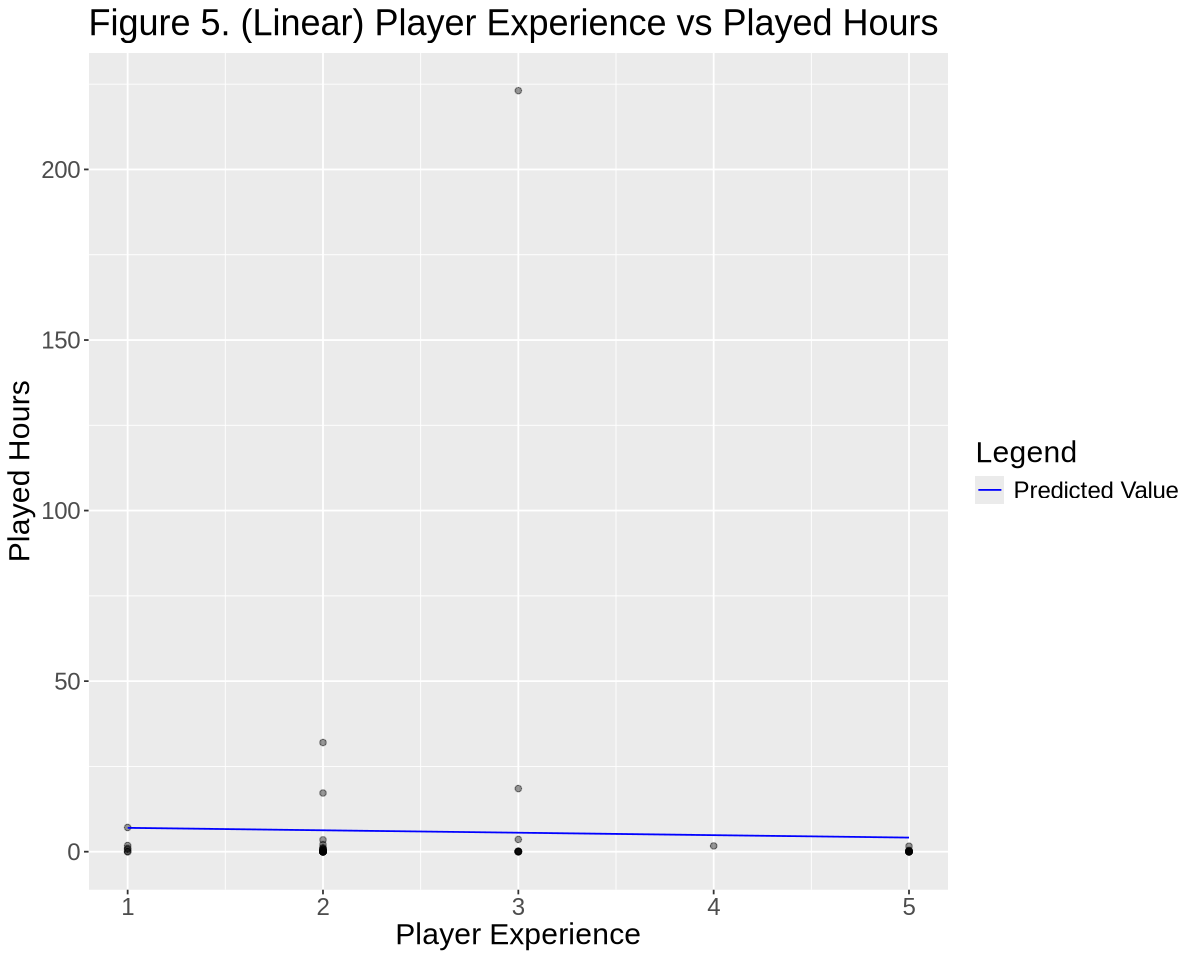

In [36]:
set.seed(411)
options(repr.plot.width = 10, repr.plot.height = 8)
testing_pred <- lm_fit |>
    predict(player_testing) |>
    bind_cols(player_testing)

experience_results <- testing_pred |>
    metrics(truth = played_hours, estimate = .pred)

testing_predictions <- testing_pred |>
     ggplot(aes(x = experience_rank, y = played_hours)) +
        geom_point(alpha = 0.4) +
         geom_line(data = testing_pred,
             mapping = aes(x = experience_rank, y = .pred, colour = "Predicted Value")) +
             scale_color_manual(name = "Legend", values = c("Predicted Value" = "blue")) +
         xlab("Player Experience") +
         ylab("Played Hours") +
    labs(title = "Figure 5. (Linear) Player Experience vs Played Hours") +
         theme(text = element_text(size = 18))

testing_predictions

testing_results <- lm_fit |>
    predict(player_testing) |>
    bind_cols(player_testing) |>
    metrics(truth = played_hours, estimate = .pred) 

testing_results

From the graph we determined that there is a weak visible correlation between a player’s experience and the number of hours they played. Additionally, based on our graph it seems the predicted values do not make any predictions beyond the domain of the dataset. This could be a contributing factor to the relatively high RMSE, suggesting KNN being better suited to make predictions based off a player's experience. RMSE = 31.78.

<h3>Discussion:</h3>

**General:**

Generally between all of our tested variables there seems to be a very slight negative correlation, besides linear regression for player age vs played hours. Where, as a player’s experience level and age increase, their hours played generally decreases. However, the nature of the dataset suggests all findings should be inconclusive as there are questions on how reliable the results are. The inconclusive results were somewhat expected since we observed early on that there were many observations with 0 played hours in the dataset. 

**Experience as a predictor:**

Experience had inconclusive results, both of the predicted values lines from KNN and linear regression were flat. For KNN the flatness could be attributed to the nature of the dataset or underfitting, but we cannot reliably conclude one or the other. As for linear regression, experience had a slight negative correlation which can be visibly observed on the graph but there also seems to be many outliers. The experience data points were unequally distributed, with a larger concentration near and at zero for played hours which creates the gaps in interpretation. As under normal circumstances given a large enough dataset, overfitting/underfitting can be determined by how steep/flat the predicted line is. Therefore, to determine whether the correlation truly exists, the dataset must be expanded and then retested in the future. 

**Age as a predictor:**

Age had relatively more interesting results. Although the predicted values line from the KNN regression model seems to follow the dataset the line is also relatively flat. This creates similar difficulties in interpretation as did for our KNN regression of player experience vs played hours, where we cannot conclude whether the flatness is due to the nature of the dataset or underfitting.  There seems to be a strong visible trend correlation between a player's age and hours played on the linear regression graph. However, as previously mentioned the predicted values expand beyond the domain of the dataset and make predictions for negative played hours past a certain age threshold. This brings into question the reliability of the model to make accurate predictions. However, it could be interpreted as increasing likelhood of never playing as age increases. These questions and gaps in interpretation can be attributed to the unequal distribution of age data points, with many near zero or zero played hours points. To determine whether there exists a correlation, the dataset should be expanded and retested. 

**Lowest RMSE:**

The RMSE for KNN regression for age was 8.64 and for scaled experience it was 5.46. The RMSE for linear regression for age 7.96 and for scaled experience it was 31.78. Based on the lowest RMSE values, the linear regression model fits relatively better for age compared to KNN but we question the reliability. For scaled experience the KNN regression model fits relatively better compared to the linear regression model. Although it is difficult to conclude anything concretely, the RMSE results imply that for age, a larger dataset should cover a larger domain beyond the current domain of the dataset resulting in the linear regression model being a better fit. Whereas, for scaled experience it implies that even with a larger dataset the domain would not change drastically than the current domain, resulting in the better fit of the KNN regression model.

**Other recommendations:**

After our group’s analyses of the Plaicraft data, we determined a list of key recommendations. The primary issue is that the players.csv dataset is too small, there isn’t enough data points to accurately determine whether a correlation exists between our chosen variables and played hours. Therefore, these findings indicate that experience level is not a useful metric for predicting player engagement. Presumably, other factors besides experience alone would be more significant in determining hours played. We considered using gender as a predictor for played hours but our initial data wrangling and cleaning showed a heavy skew of male players while female, non-binary, two-spirited, and other genders not having equal or similar representation. Thus, it may be better to gather more data from players that identify as female, non-binary, two-spirited, or other before a more in depth analysis. Additionally, there may be other variables that have stronger pull on played hours or a combination of variables besides just experience or age alone are needed to create a stronger aggregate predictor.
Game developers would need to consider additional variables to predict user behaviour effectively as focusing just on age or experience will lead to inconclusive results/false assumptions about player activity. It leads to future questions about whether other variables would be able to predict played hours better or if larger datasets with longer hours played could improve the model's performance using age and experience level. As well as, how would removing outliers affect the model's accuracy. By addressing these limitations and exploring a wider range of variables with more balanced and extensive data, future analyses could provide more accurate insights into player engagement and behaviour.



<h3>References:</h3>
1. Hoelsher, A. (2018, May 23). Add legend to geom_line() graph in r. StackOverflow. https://stackoverflow.com/questions/40833809/add-legend-to-geom-line-graph-in-r
